In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

visa_df=pd.read_csv('visadataset.csv')
cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

In [2]:
visa_df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [3]:
data=visa_df['prevailing_wage']
q1=np.quantile(data,0.25)
q3=np.quantile(data,0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
con1=data<lb
con2=data>ub
con3=con1 ^ con2
outlier=visa_df[con3]
outlier


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [4]:
con1=data>lb
con2=data<ub
con3=con1 & con2
non_outlier=visa_df[con3]
non_outlier

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**how to treate outliers**

**method-1: drop the outliers**

- if outliers has less than 2% of total data we can drop the outliers

- drop the outliers is not a recommended approach

- if we drop the outliers other columns dataalso drop

- we encounter a situation that loose the data

**method-2: fill with median**

- we already know that outliers does not affect by median

- so it is always a good approach fill the outliers with median

**method-3: cap the outliers**

- instead of fill the outliers with median , we can fill with q3 and q1

In [5]:
# step-1: lb and ub
# step-2: cal median
# step-3: new data=[]
# step-4: iterate each value from pwage
# step-5: if the value <lb or >ub
# step-6: new data.append(median)
# step-7: else:
# step-8:     new data.append(value)
#step-9:  visa_df['pwage']=new data


data=visa_df['prevailing_wage']
q1=round(np.quantile(data,0.25),2)
q3=round(np.quantile(data,0.75),2)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
lb,ub
median=data.median()
new_data=[]
for i in data:
    if i<lb or i>ub:
        new_data.append(median)
    else:
        new_data.append(i)
visa_df['pwage']=new_data
visa_df['pwage']

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476     70308.2100
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: pwage, Length: 25480, dtype: float64

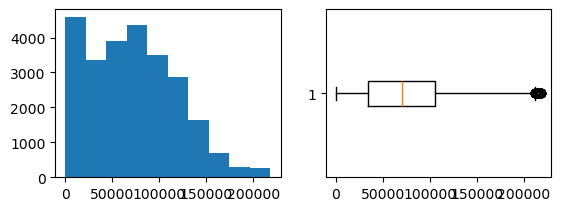

In [6]:
plt.subplot(2,2,1).hist(visa_df['pwage'])
plt.subplot(2,2,2).boxplot(visa_df['pwage'],vert=False)
plt.show()

**np.where**

- np.where is a method to do if-else task in single line

- np.where(condition,True,Falsevalue)

- it takes 3 arguments

      - condition 

      - if condition is True the it takes True value

      - if condition is False the it takes False value

In [74]:
dict1={'sub':['Ds','De','Cs','Iot'],
       'Marks':[100,200,300,400]}
df=pd.DataFrame(dict1)
df

,sub,Marks
0,Ds,100
1,De,200
2,Cs,300
3,Iot,400


In [75]:
con=df['Marks']>200
true='super'
false='avg'
df['new']=np.where(con,true,false)
df

,sub,Marks,new
0,Ds,100,avg
1,De,200,avg
2,Cs,300,super
3,Iot,400,super


In [3]:
data=visa_df['prevailing_wage']
q1=round(np.quantile(data,0.25),2)
q3=round(np.quantile(data,0.75),2)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
lb,ub
median=data.median()
con=(visa_df['prevailing_wage']<lb) ^ (visa_df['prevailing_wage']>ub)
true=median
false=visa_df['prevailing_wage']

visa_df['p_wage_1']=np.where(con,true,false)

In [4]:
visa_df['p_wage_1']

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476     70308.2100
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: p_wage_1, Length: 25480, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x29b04d4a4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x29b04d4bc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x29b04d49cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x29b04d548d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29b04d55490>],
 'means': []}

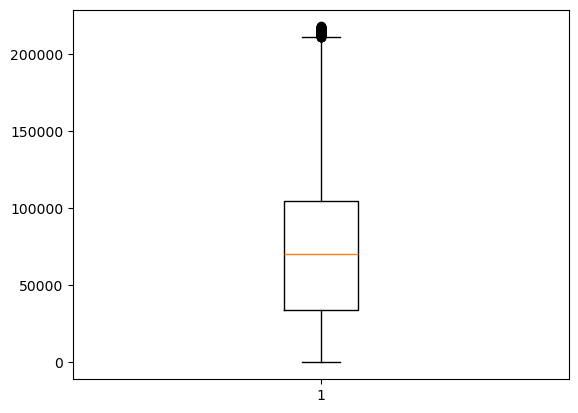

In [79]:
plt.boxplot(visa_df['p_wage_1'])